In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

nbn = "05_" # Notebook Number; Prefix for artifacts path

In [237]:
datasets = ["Caltech256","iWildCam","iWildCamID","CIFAR10","CINIC10"] # GTSRB, MNIST, EuroSAT
test_dypes = ["InD","InD","OOD","InD","OOD"]
nrow, ncol=2, 3
pred_prefix = "csv/prediction_"
unc_prefix = "csv/uncertainty_"

In [238]:
ds = "CINIC10"
pred = pd.read_csv(f"{pred_prefix}{ds}.csv", index_col="Unnamed: 0")
unc_pred = pd.read_csv(f"{unc_prefix}{ds}.csv", index_col="Unnamed: 0")
metrics = [
    (unc_pred["ent_50"], "entr50_on_res50", "pred50"),
    (unc_pred["ce_50_18"], "ce_50_18_on_res50", "pred50"),
    (unc_pred["ent_50"] * unc_pred["ce_50_18"], "entr50_x_ce_50_18_on_res50", "pred50"),
    (unc_pred["ent_50"] * np.log(unc_pred["ce_50_18"]), "log_entr50_x_ce_50_18_on_res50", "pred50")
]
rank = pd.DataFrame()
for unc_vec,name,evaluatee in metrics:
    print(f"{unc_vec.shape=};{name=}; {evaluatee=}")
    rank[name] = unc_vec.rank()

unc_vec.shape=(90000,);name='entr50_on_res50'; evaluatee='pred50'
unc_vec.shape=(90000,);name='ce_50_18_on_res50'; evaluatee='pred50'
unc_vec.shape=(90000,);name='entr50_x_ce_50_18_on_res50'; evaluatee='pred50'
unc_vec.shape=(90000,);name='log_entr50_x_ce_50_18_on_res50'; evaluatee='pred50'


In [239]:
rank["nll50"] = unc_pred["nll_50"]
rank["nll18"] = unc_pred["nll_18"]

Text(0.5, 1.0, 'NLL of Resnet18 and Resnet50 when ce and entr has different ranking (lower is confident)')

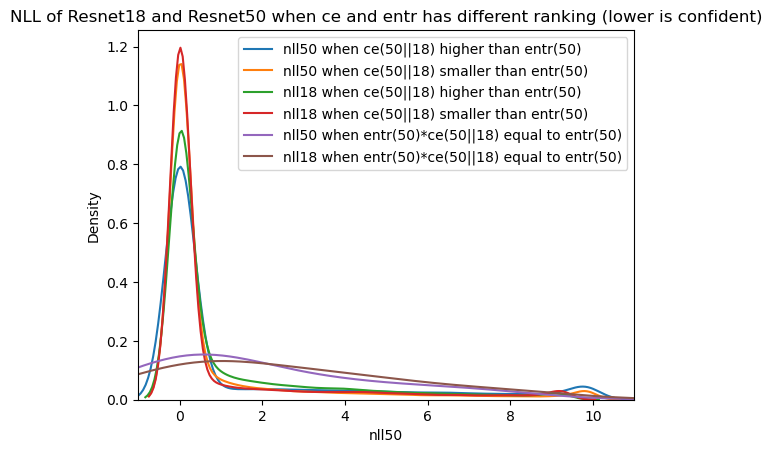

In [240]:
# Assuming rank has a column named 'nll50'
filtered_rank = rank[rank["ce_50_18_on_res50"] > rank["entr50_on_res50"]]
sns.kdeplot(data=filtered_rank, x="nll50",label="nll50 when ce(50||18) higher than entr(50)")
filtered_rank = rank[rank["ce_50_18_on_res50"] < rank["entr50_on_res50"]]
sns.kdeplot(data=filtered_rank, x="nll50",label="nll50 when ce(50||18) smaller than entr(50)")
filtered_rank = rank[rank["ce_50_18_on_res50"] > rank["entr50_on_res50"]]
sns.kdeplot(data=filtered_rank, x="nll18",label="nll18 when ce(50||18) higher than entr(50)")
filtered_rank = rank[rank["ce_50_18_on_res50"] < rank["entr50_on_res50"]]
sns.kdeplot(data=filtered_rank, x="nll18",label="nll18 when ce(50||18) smaller than entr(50)")
filtered_rank = rank[rank["entr50_x_ce_50_18_on_res50"] == rank["entr50_on_res50"]]
sns.kdeplot(data=filtered_rank, x="nll50",label="nll50 when entr(50)*ce(50||18) equal to entr(50)")
filtered_rank = rank[rank["entr50_x_ce_50_18_on_res50"] == rank["entr50_on_res50"]]
sns.kdeplot(data=filtered_rank, x="nll18",label="nll18 when entr(50)*ce(50||18) equal to entr(50)")
plt.legend()
plt.xlim(-1,11)
plt.title("NLL of Resnet18 and Resnet50 when ce and entr has different ranking (lower is confident)")

Text(0.5, 1.0, 'NLL of Resnet18 and Resnet50 when ce*entr and entr has different ranking (lower is confident)')

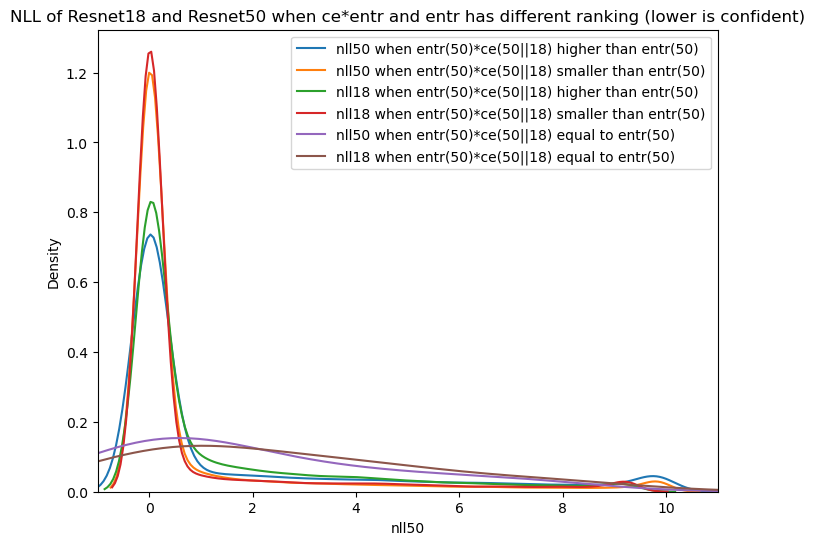

In [241]:
plt.figure(figsize=(8,6))
filtered_rank = rank[rank["entr50_x_ce_50_18_on_res50"] > rank["entr50_on_res50"]]
sns.kdeplot(data=filtered_rank, x="nll50",label="nll50 when entr(50)*ce(50||18) higher than entr(50)")
filtered_rank = rank[rank["entr50_x_ce_50_18_on_res50"] < rank["entr50_on_res50"]]
sns.kdeplot(data=filtered_rank, x="nll50",label="nll50 when entr(50)*ce(50||18) smaller than entr(50)")
filtered_rank = rank[rank["entr50_x_ce_50_18_on_res50"] > rank["entr50_on_res50"]]
sns.kdeplot(data=filtered_rank, x="nll18",label="nll18 when entr(50)*ce(50||18) higher than entr(50)")
filtered_rank = rank[rank["entr50_x_ce_50_18_on_res50"] < rank["entr50_on_res50"]]
sns.kdeplot(data=filtered_rank, x="nll18",label="nll18 when entr(50)*ce(50||18) smaller than entr(50)")
filtered_rank = rank[rank["entr50_x_ce_50_18_on_res50"] == rank["entr50_on_res50"]]
sns.kdeplot(data=filtered_rank, x="nll50",label="nll50 when entr(50)*ce(50||18) equal to entr(50)")
filtered_rank = rank[rank["entr50_x_ce_50_18_on_res50"] == rank["entr50_on_res50"]]
sns.kdeplot(data=filtered_rank, x="nll18",label="nll18 when entr(50)*ce(50||18) equal to entr(50)")
plt.legend()
plt.xlim(-1,11)
plt.title("NLL of Resnet18 and Resnet50 when ce*entr and entr has different ranking (lower is confident)")

I think this is great because:  
When ce is more confident than entr, both models are very confidently correct.  
When ce is less certain than entr, both models are not as certainly correct

In [242]:
rank.head()

,entr50_on_res50,ce_50_18_on_res50,entr50_x_ce_50_18_on_res50,log_entr50_x_ce_50_18_on_res50,nll50,nll18
0,36391.0,30138.0,31670.0,28638.0,0.000020,0.000000
1,56864.0,57269.0,57050.0,14897.0,4.467719,1.479469
2,9151.0,17597.0,16240.0,57407.0,0.000000,0.000000
3,37565.0,31380.0,32936.0,27666.0,0.000053,0.000022
4,35237.0,29958.0,30928.0,29704.0,0.000002,0.000220


In [243]:
rank["ce_doubt"] = rank["ce_50_18_on_res50"] - rank["entr50_on_res50"]
display(rank.head())

,entr50_on_res50,ce_50_18_on_res50,entr50_x_ce_50_18_on_res50,log_entr50_x_ce_50_18_on_res50,nll50,nll18,ce_doubt
0,36391.0,30138.0,31670.0,28638.0,0.000020,0.000000,-6253.0
1,56864.0,57269.0,57050.0,14897.0,4.467719,1.479469,405.0
2,9151.0,17597.0,16240.0,57407.0,0.000000,0.000000,8446.0
3,37565.0,31380.0,32936.0,27666.0,0.000053,0.000022,-6185.0
4,35237.0,29958.0,30928.0,29704.0,0.000002,0.000220,-5279.0


Text(0.5, 1.0, 'ce and entr ranking disagreement')

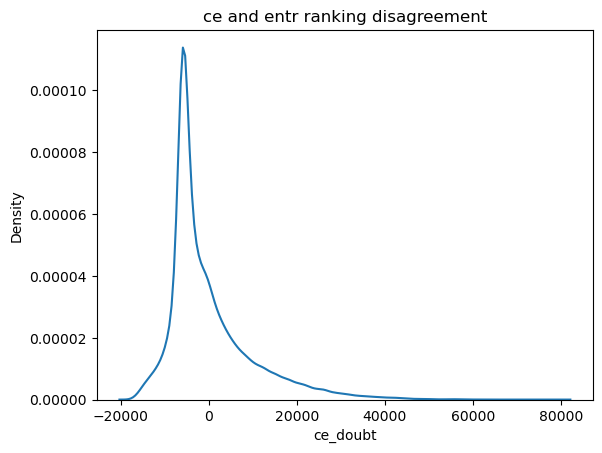

In [244]:
sns.kdeplot(rank["ce_doubt"])
plt.title("ce and entr ranking disagreement")

<Axes: xlabel='ce_doubt', ylabel='nll50'>

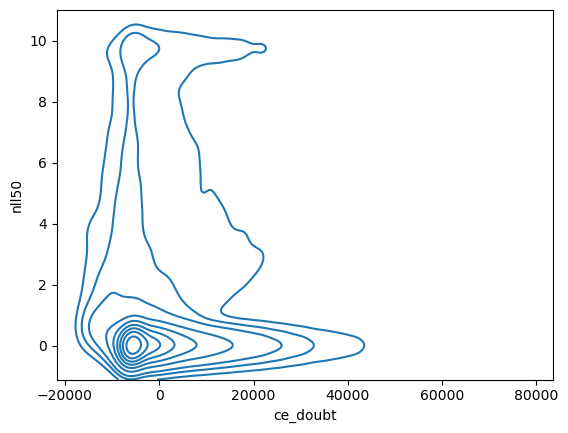

In [245]:
# rank=rank.head(100)
sns.kdeplot(x=rank["ce_doubt"],y=rank["nll50"])

In [246]:
unc_pred.head()
pred.head()

,pred18,pred50,pred101,target
0,0,0,0,0
1,8,8,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


Text(0.5, 1.0, 'nll50 against gained uncertainty from ce')

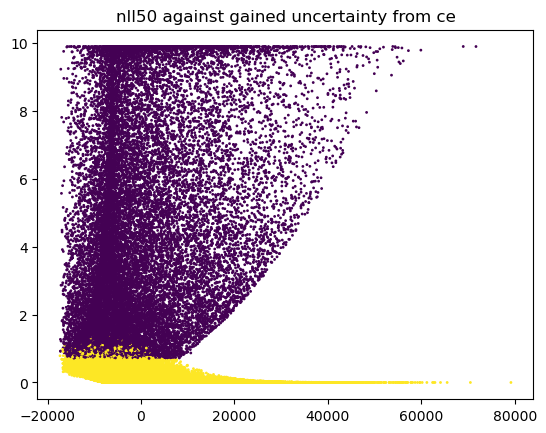

In [247]:
plt.scatter(x=rank["ce_doubt"],y=rank["nll50"],c=pred["pred50"]==pred["target"],s=1)
plt.title("nll50 against gained uncertainty from ce")

## Accuracy vs Coverage Tradeoff

### Baseline: Softmax Response (Selective Classification for Deep Neural Networks)

In [248]:
rank["sr50"] = unc_pred["softmax_response50"].rank(ascending=False)
display(pred.head(2))
display(rank.head(2))

,pred18,pred50,pred101,target
0,0,0,0,0
1,8,8,0,0


,entr50_on_res50,ce_50_18_on_res50,entr50_x_ce_50_18_on_res50,log_entr50_x_ce_50_18_on_res50,nll50,nll18,ce_doubt,sr50
0,36391.0,30138.0,31670.0,28638.0,0.000020,0.000000,-6253.0,36300.0
1,56864.0,57269.0,57050.0,14897.0,4.467719,1.479469,405.0,57346.0


In [265]:
def get_cov_acc(cov_range,rank_cri,len_pred,rank_name,ax):
    temp=pd.DataFrame()
    temp["coverage"] = cov_range
    coverage_ls = cov_range/100*len_pred
    for i, cov in enumerate(coverage_ls):
        cov_pred = pred[rank_cri<cov]
        temp.loc[i,"acc"] = np.mean(cov_pred["pred50"]==cov_pred["target"])
    area = np.trapz(temp["acc"], cov_range)
    sns.lineplot(temp,x="coverage",y="acc",label=f"{rank_name}: (AUC: {area:.2f})",ax = ax)

In [266]:
def get_rank(unc_pred):
    metrics = [
        (unc_pred["ent_50"], "entr50_on_res50", "pred50"),
        (unc_pred["ent_101"], "entr101_on_res101", "pred101"),
        (unc_pred["ce_50_18"], "ce_50_18_on_res50", "pred50"),
        (unc_pred["ent_50"] * unc_pred["ce_50_18"], "entr50_x_ce_50_18_on_res50", "pred50"),
        (unc_pred["ent_50"] * np.log(unc_pred["ce_50_18"]), "log_entr50_x_ce_50_18_on_res50", "pred50")
    ]
    rank = pd.DataFrame()
    for unc_vec,name,evaluatee in metrics:
        print(f"{unc_vec.shape=};{name=}; {evaluatee=}")
        rank[name] = unc_vec.rank()
    rank["sr50"] = unc_pred["softmax_response50"].rank(ascending=False)    
    return rank

unc_vec.shape=(6122,);name='entr50_on_res50'; evaluatee='pred50'
unc_vec.shape=(6122,);name='entr101_on_res101'; evaluatee='pred101'
unc_vec.shape=(6122,);name='ce_50_18_on_res50'; evaluatee='pred50'
unc_vec.shape=(6122,);name='entr50_x_ce_50_18_on_res50'; evaluatee='pred50'
unc_vec.shape=(6122,);name='log_entr50_x_ce_50_18_on_res50'; evaluatee='pred50'
unc_vec.shape=(42791,);name='entr50_on_res50'; evaluatee='pred50'
unc_vec.shape=(42791,);name='entr101_on_res101'; evaluatee='pred101'
unc_vec.shape=(42791,);name='ce_50_18_on_res50'; evaluatee='pred50'
unc_vec.shape=(42791,);name='entr50_x_ce_50_18_on_res50'; evaluatee='pred50'
unc_vec.shape=(42791,);name='log_entr50_x_ce_50_18_on_res50'; evaluatee='pred50'
unc_vec.shape=(8154,);name='entr50_on_res50'; evaluatee='pred50'
unc_vec.shape=(8154,);name='entr101_on_res101'; evaluatee='pred101'
unc_vec.shape=(8154,);name='ce_50_18_on_res50'; evaluatee='pred50'
unc_vec.shape=(8154,);name='entr50_x_ce_50_18_on_res50'; evaluatee='pred50'
unc_vec

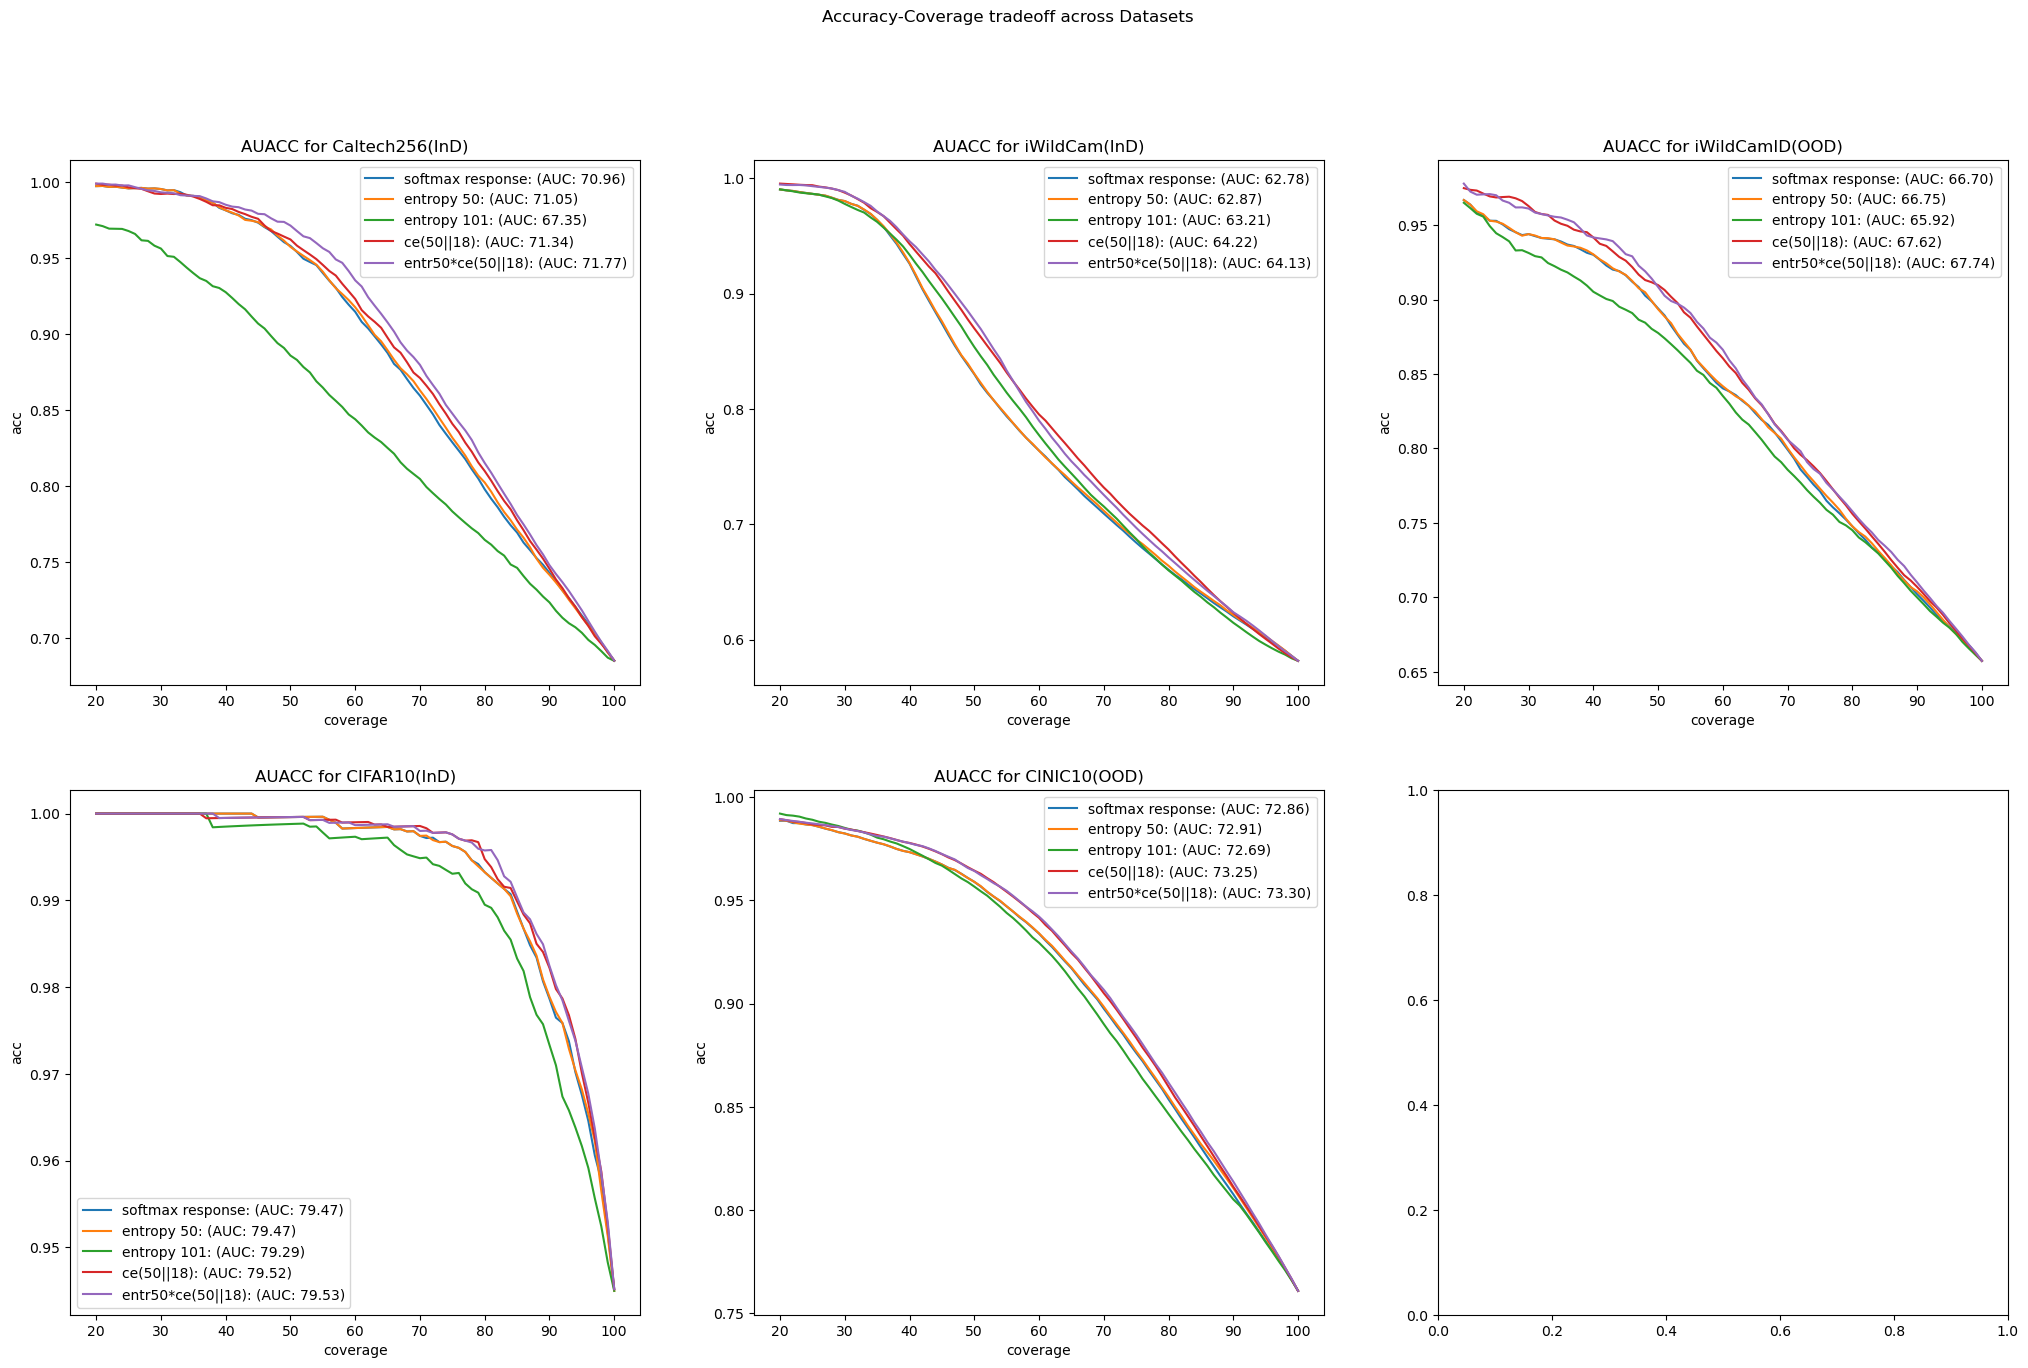

In [267]:
cov_range = np.arange(20,101)
fig, axes = plt.subplots(nrow, ncol, figsize=(25, 15))

for i, ds in enumerate(datasets):
    pred = pd.read_csv(f"{pred_prefix}{ds}.csv", index_col="Unnamed: 0")
    unc_pred = pd.read_csv(f"{unc_prefix}{ds}.csv", index_col="Unnamed: 0")
    rank=get_rank(unc_pred)
    ax = axes[i // ncol, i % ncol]
    get_cov_acc(cov_range,rank["sr50"],pred.shape[0],"softmax response",ax)
    get_cov_acc(cov_range,rank["entr50_on_res50"],pred.shape[0],"entropy 50",ax)
    get_cov_acc(cov_range,rank["entr101_on_res101"],pred.shape[0],"entropy 101",ax)
    get_cov_acc(cov_range,rank["ce_50_18_on_res50"],pred.shape[0],"ce(50||18)",ax)
    get_cov_acc(cov_range,rank["entr50_x_ce_50_18_on_res50"],pred.shape[0],"entr50*ce(50||18)",ax)
    ax.set_title(f"AUACC for {ds}({test_dypes[i]})")
plt.suptitle(f"Accuracy-Coverage tradeoff across Datasets")
plt.savefig(f"artifacts/{nbn}auacc.png")